In [5]:
import numpy as np
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import os

In [15]:
TRAINING_DIR = r'C:\Users\Andri\Documents\Machine Learning\Bangkit\Self Learning\Hummingbirds\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = r'C:\Users\Andri\Documents\Machine Learning\Bangkit\Self Learning\Hummingbirds\valid'
validation_datagen = ImageDataGenerator(rescale = 1./255)

TEST_DIR = r'C:\Users\Andri\Documents\Machine Learning\Bangkit\Self Learning\Hummingbirds\test'
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=10
)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                        target_size=(224,224),
                        batch_size=10,
                        class_mode='categorical')

Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [27]:
model = tf.keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",input_shape = (224,224,3),
        trainable=True, arguments=dict(batch_norm_momentum=0.997)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1001)              2555993   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                64128     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 2,620,381
Trainable params: 2,608,269
Non-trainable params: 12,112
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator,validation_data = validation_generator,epochs = 20,verbose = 1)

Epoch 1/20
40/40 [==============================] - 13s 153ms/step - loss: 1.9130 - accuracy: 0.4676 - val_loss: 2.3458 - val_accuracy: 0.5750
Epoch 2/20
40/40 [==============================] - 6s 140ms/step - loss: 1.2098 - accuracy: 0.6995 - val_loss: 1.7109 - val_accuracy: 0.7500
Epoch 3/20
40/40 [==============================] - 6s 144ms/step - loss: 0.9247 - accuracy: 0.8538 - val_loss: 3.3928 - val_accuracy: 0.6125
Epoch 4/20
40/40 [==============================] - 6s 147ms/step - loss: 0.7623 - accuracy: 0.8885 - val_loss: 4.2368 - val_accuracy: 0.5625
Epoch 5/20
40/40 [==============================] - 6s 149ms/step - loss: 0.7185 - accuracy: 0.8892 - val_loss: 3.9218 - val_accuracy: 0.7250
Epoch 6/20
40/40 [==============================] - 6s 150ms/step - loss: 0.8897 - accuracy: 0.8473 - val_loss: 1.6933 - val_accuracy: 0.7375
Epoch 7/20
40/40 [==============================] - 6s 150ms/step - loss: 0.7650 - accuracy: 0.8908 - val_loss: 0.7775 - val_accuracy: 0.9125
Epoch

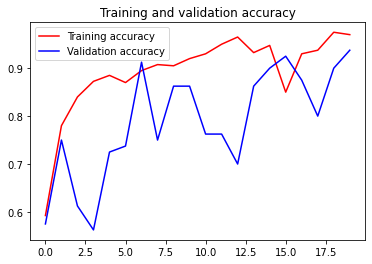

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [31]:
# Evaluate against test data.
scores = model.evaluate(test_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

8/8 [==============================] - 1s 26ms/step - loss: 0.6011 - accuracy: 0.9500
Test loss: 0.6010704636573792
Test accuracy: 0.949999988079071


In [32]:
#saving the model
model.save("hummingbirdmobilenetv3.h5")